In [145]:
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#total number of reports
len(data_jlib)
#564100

564100

In [4]:
#data_xray = data_jlib.copy()

In [29]:
#load xray reports h5 file
%%time
xray_jlib = joblib.load("xray_reports.h5")
print("success!")

success!
CPU times: user 2min 21s, sys: 12min 21s, total: 14min 42s
Wall time: 32min 31s


In [25]:
#number of xray reports
len(xray_dict)

152319

In [31]:
#check if every entry has XRAY as modality
for report_key in xray_jlib.keys():
    if 'modality' in xray_jlib[report_key]:
        if xray_jlib[report_key]['modality'] != 'XRAY':
            print(xray_jlib[report_key]['modality'])
    else:
        continue

In [40]:
xray_jlib['Report_1']

{'report_id': 0,
 'modality': 'XRAY',
 'clinical_information': {'clinical_information': '34 years old female with history of sickle cell disease status post right total shoulder. Evaluate for component placement.',
  'age': '34.0',
  'gender': 'female',
  'background': {'sickle cell disease': {'clinical finding': 'sickle cell disease',
    'cf_snomed': {'disease': 64572001},
    'existence': 'unc_dx',
    'descriptive_term': 'sickle cell',
    'observation': 'disease'}}},
 'findings_group': {'findings': 'The right total shoulder arthroplasty components are in anatomic alignment. There is no evidence of fracture or dislocation',
  'findings_sentences': {'Sentence-1': {'report_sid_fin': 0.0,
    'sentence_fin': 'the right total shoulder arthroplasty components are in anatomic alignment',
    'anatomical entity_fin': {'shoulder': {}},
    'location descriptor_fin': ['right'],
    'procedure_fin': ['arthroplasty'],
    'clinical findings_fin': {'anatomic alignment': {'clinical finding': 'a

### EDA

#### Keys in each report

In [175]:
xray_jlib['Report_1'].keys()

dict_keys(['report_id', 'modality', 'clinical_information', 'findings_group', 'impression_group'])

#### Clinical information

In [44]:
xray_jlib['Report_1']['clinical_information']

{'clinical_information': '34 years old female with history of sickle cell disease status post right total shoulder. Evaluate for component placement.',
 'age': '34.0',
 'gender': 'female',
 'background': {'sickle cell disease': {'clinical finding': 'sickle cell disease',
   'cf_snomed': {'disease': 64572001},
   'existence': 'unc_dx',
   'descriptive_term': 'sickle cell',
   'observation': 'disease'}}}

In [103]:
# percentage of reports with no clinical information
empty_clinical_info = 0

for report in xray_jlib.values():
    if 'clinical_information' in report:
        if (len(report['clinical_information'].values())==1) | ('empty.' in report['clinical_information'].values()):
            empty_clinical_info += 1

empty_clinical_info/len(xray_jlib)

0.07679934873522017

##### Age

In [47]:
xray_jlib['Report_1']['clinical_information']['age']

'34.0'

In [153]:
#get all ages
ages = []

for report in xray_jlib.values():
    if 'clinical_information' in report:
        age = report['clinical_information'].get('age')
        if age is not None:
            ages.append(float(age))
        else:
            ages.append(None)

In [154]:
#no age record
ages.count(None)

67023

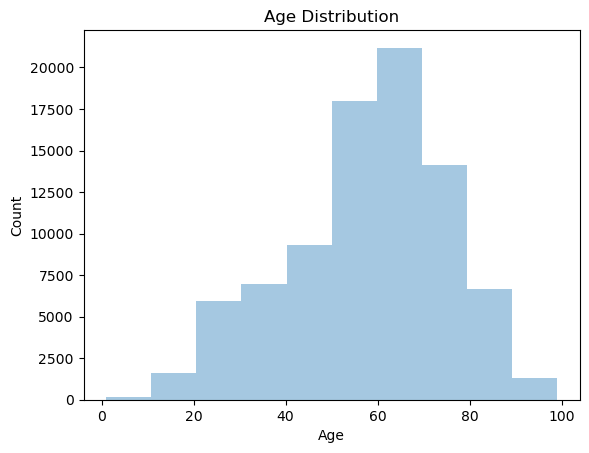

In [155]:
sns.distplot(ages, bins=10, kde=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


##### gender

In [78]:
genders = []

for report in xray_jlib.values():
    if 'clinical_information' in report:
        gender = report['clinical_information'].get('gender')
        if gender is not None:
            genders.append(gender)
        else:
            genders.append('null')

In [79]:
dict((x,genders.count(x)) for x in set(genders))

{'null': 60950, 'male': 44779, 'female': 46534}

In [159]:
#percentage of male
44779/(46534+44779)

0.49039019635758324

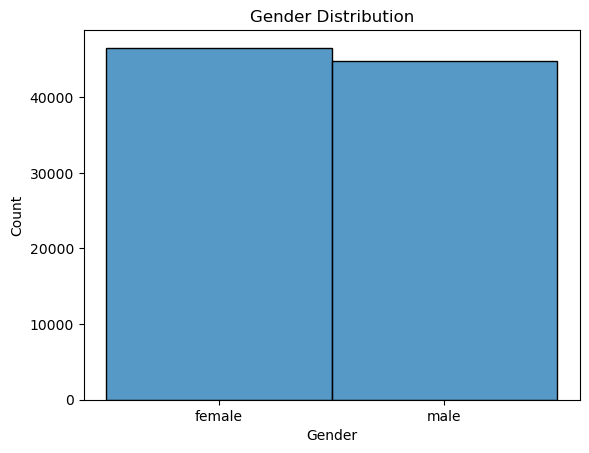

In [67]:
sns.histplot(genders, kde=False)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

##### background

In [73]:
#only one disease
xray_jlib['Report_1']['clinical_information'].get('background')

{'sickle cell disease': {'clinical finding': 'sickle cell disease',
  'cf_snomed': {'disease': 64572001},
  'existence': 'unc_dx',
  'descriptive_term': 'sickle cell',
  'observation': 'disease'}}

In [117]:
#more than one disease
xray_jlib['Report_64']['clinical_information'].get('background')

{'thoracotomy': {'clinical finding': 'thoracotomy',
  'existence': 'pos_dx',
  'observation': 'thoracotomy'},
 'question right pneumothorax': {'clinical finding': 'question right pneumothorax',
  'cf_snomed': {'right pneumothorax': 109363001},
  'existence': 'pos_dx',
  'descriptive_term': 'question right',
  'observation': 'pneumothorax'}}

In [109]:
#all diseases
diseases = []
            
for report in xray_jlib.values():
    if ('clinical_information' in report):
        if report['clinical_information'].get('background') is not None:
            disease = list(report['clinical_information'].get('background').keys())
            if disease is not None:
                diseases.append(disease)
            else:
                diseases.append('Null')

diseases[:10]

[['sickle cell disease'],
 ['low back pain'],
 ['dobbhoff tube'],
 ['free air'],
 ['hemoglobin'],
 ['question pneumonia'],
 ['thoracotomy', 'question right pneumothorax'],
 ['worsening left pneumothorax'],
 ['myocardial infarction'],
 ['myocardial infarction']]

In [176]:
print(diseases[:15])

[['sickle cell disease'], ['low back pain'], ['dobbhoff tube'], ['free air'], ['hemoglobin'], ['question pneumonia'], ['thoracotomy', 'question right pneumothorax'], ['worsening left pneumothorax'], ['myocardial infarction'], ['myocardial infarction'], ['myocardial infarction'], ['desaturation', 'pneumonia'], ['chronic renal disease'], ['right pneumothorax'], ['post chest tube']]


#### findings_group

In [164]:
xray_jlib['Report_3']['findings_group']

{'findings': 'The colon is adequately cleansed and distended. There is a small to moderate amount of mostly well-tagged fluid and liquid stool. Few diminutive foci that are not tagged. No significant colonic polyps or masses identified. CT colonography is not intended for the detection of diminutive colonic polyps , the presence or absence of which will not change management of the patient. EXTRACOLONIC',
 'findings_sentences': {'Sentence-1': {'report_sid_fin': 6.0,
   'sentence_fin': 'the colon is adequately cleansed and distended',
   'imaging observation_fin': ['colon'],
   'clinical findings_fin': {'cleansed': {'clinical finding': 'cleansed',
     'existence': 'pos_dx',
     'observation': 'cleansed'},
    'distended': {'clinical finding': 'distended',
     'existence': 'pos_dx',
     'observation': 'distended'}}},
  'Sentence-2': {'report_sid_fin': 7.0,
   'sentence_fin': 'there is a small to moderate amount of mostly well-tagged fluid and liquid stool',
   'anatomical entity_fin'

In [166]:
print(xray_jlib['Report_3']['findings_group']['findings_sentences']['Sentence-1'].keys())
print(xray_jlib['Report_3']['findings_group']['findings_sentences']['Sentence-2'].keys())
print(xray_jlib['Report_3']['findings_group']['findings_sentences']['Sentence-3'].keys())
print(xray_jlib['Report_3']['findings_group']['findings_sentences']['Sentence-4'].keys())
print(xray_jlib['Report_3']['findings_group']['findings_sentences']['Sentence-5'].keys())

dict_keys(['report_sid_fin', 'sentence_fin', 'imaging observation_fin', 'clinical findings_fin'])
dict_keys(['report_sid_fin', 'sentence_fin', 'anatomical entity_fin', 'clinical findings_fin'])
dict_keys(['report_sid_fin', 'sentence_fin', 'imaging observation_fin', 'clinical findings_fin'])
dict_keys(['report_sid_fin', 'sentence_fin', 'clinical findings_fin'])
dict_keys(['report_sid_fin', 'sentence_fin', 'procedure_fin', 'clinical findings_fin'])


Each sentence can have different labels. 

In [125]:
for report in xray_jlib.values():
    if 'findings_group' not in report:
        print(report)
#all reports have finding sections

In [129]:
for report in xray_jlib.values():
    if len(report['findings_group']['findings']) == 0:
        print(report, " has finding section but it is empty")
        
#no reports have empty finding sections

##### findings_sentences

In [136]:
# What labels do we have in each findings sentence?
xray_jlib['Report_1']['findings_group']['findings_sentences']['Sentence-1'].keys()

dict_keys(['report_sid_fin', 'sentence_fin', 'anatomical entity_fin', 'location descriptor_fin', 'procedure_fin', 'clinical findings_fin'])

In [137]:
#How many sentences do each report's findings section has?
finding_sentences = []

for report in xray_jlib.values():
    if 'findings_group' in report:
        num = len(report['findings_group']['findings_sentences'])
        if num is not None:
            finding_sentences.append(num)
        else:
            finding_sentences.append(0)

In [138]:
dict((x,finding_sentences.count(x)) for x in set(finding_sentences))

{1: 3141,
 2: 20026,
 3: 39015,
 4: 37028,
 5: 25102,
 6: 13798,
 7: 6610,
 8: 3270,
 9: 1568,
 10: 912,
 11: 576,
 12: 334,
 13: 234,
 14: 155,
 15: 117,
 16: 76,
 17: 72,
 18: 54,
 19: 45,
 20: 28,
 21: 20,
 22: 25,
 23: 20,
 24: 17,
 25: 16,
 26: 13,
 27: 10,
 28: 6,
 29: 5,
 30: 5,
 31: 3,
 32: 5,
 33: 4,
 34: 1,
 35: 2,
 37: 1,
 38: 3,
 40: 1,
 41: 1}

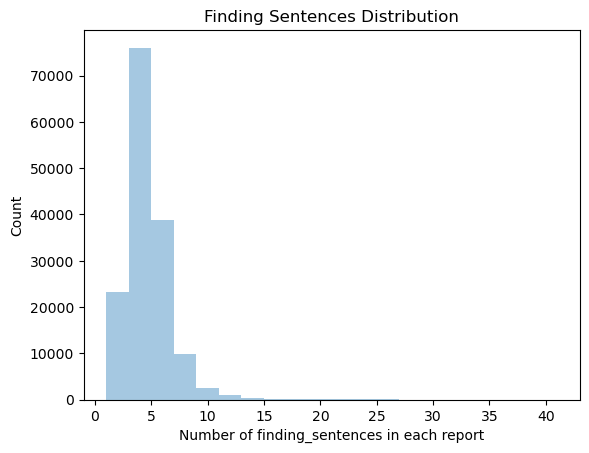

In [124]:
sns.distplot(finding_sentences, bins=20, kde=False)
plt.xlabel('Number of finding_sentences in each report')
plt.ylabel('Count')
plt.title('Finding Sentences Distribution')
plt.show()

'Report_1', 'Report_2', 'Report_3', 'Report_11', 'Report_12', 'Report_61', 'Report_63', 'Report_64', 'Report_66', 'Report_67', 'Report_68', 'Report_69', 'Report_70', 'Report_71', 'Report_73', 'Report_74', 'Report_75', 'Report_77', 'Report_78', 'Report_80', 'Report_81', 'Report_82', 'Report_83', 'Report_84', 'Report_85', 'Report_87', 'Report_88', 'Report_89', 'Report_90', 'Report_91', 'Report_93', 'Report_94', 'Report_95', 'Report_96', 'Report_97', 'Report_98', 'Report_99', 'Report_100', 'Report_101', 'Report_102', 'Report_103', 'Report_105', 'Report_106', 'Report_107', 'Report_109', 'Report_111', 'Report_112', 'Report_113', 'Report_116', 'Report_117', 'Report_118', 'Report_120', 'Report_123', 'Report_126', 'Report_128', 'Report_149', 'Report_150', 'Report_151', 'Report_152', 'Report_153', 'Report_154', 'Report_155', 'Report_156', 'Report_157', 'Report_158', 'Report_159', 'Report_160', 'Report_161', 'Report_162'

#### impression_group

In [182]:
xray_jlib['Report_63']['impression_group']

{'impression': 'No significant cardiopulmonary abnormality.',
 'impression_sentences': {'Sentence-1': {'report_sid': 147.0,
   'sentence': 'no significant cardiopulmonary abnormality',
   'clinical findings': {'significant cardiopulmonary abnormality': {'clinical finding': 'significant cardiopulmonary abnormality',
     'existence': 'neg_dx',
     'descriptive_term': 'significant cardiopulmonary',
     'observation': 'abnormality'}}}}}

In [130]:
for report in xray_jlib.values():
    if 'impression_group' not in report:
        print(report)
#all reports have impression sections

In [131]:
for report in xray_jlib.values():
    if len(report['impression_group']['impression']) == 0:
        print(report, " has impression section but it is empty")
        
#no reports have empty impression sections

#### impression_sentences

In [183]:
# What labels do we have in each impression sentence?
print(xray_jlib['Report_152']['impression_group']['impression_sentences']['Sentence-1'].keys())
print(xray_jlib['Report_3']['impression_group']['impression_sentences']['Sentence-2'].keys())
print(xray_jlib['Report_3']['impression_group']['impression_sentences']['Sentence-3'].keys())
print(xray_jlib['Report_3']['impression_group']['impression_sentences']['Sentence-4'].keys())
print(xray_jlib['Report_3']['impression_group']['impression_sentences']['Sentence-5'].keys())
print(xray_jlib['Report_3']['impression_group']['impression_sentences']['Sentence-6'].keys())
print(xray_jlib['Report_3']['impression_group']['impression_sentences']['Sentence-7'].keys())

dict_keys(['report_sid', 'sentence', 'anatomical entity', 'location descriptor', 'clinical findings'])
dict_keys(['report_sid', 'sentence'])
dict_keys(['report_sid', 'sentence', 'clinical findings'])
dict_keys(['report_sid', 'sentence'])
dict_keys(['report_sid', 'sentence', 'clinical findings'])
dict_keys(['report_sid', 'sentence'])
dict_keys(['report_sid', 'sentence', 'clinical findings'])


In [139]:
#How many sentences do each report's findings section has?
impression_sentences = []

for report in xray_jlib.values():
    if 'impression_group' in report:
        num = len(report['impression_group']['impression_sentences'])
        if num is not None:
            impression_sentences.append(num)
        else:
            impression_sentences.append(0)

In [140]:
dict((x,impression_sentences.count(x)) for x in set(impression_sentences))

{1: 98725,
 2: 42011,
 3: 9100,
 4: 1871,
 5: 417,
 6: 93,
 7: 39,
 8: 30,
 9: 14,
 10: 8,
 11: 5,
 12: 2,
 15: 2,
 16: 1,
 17: 1}

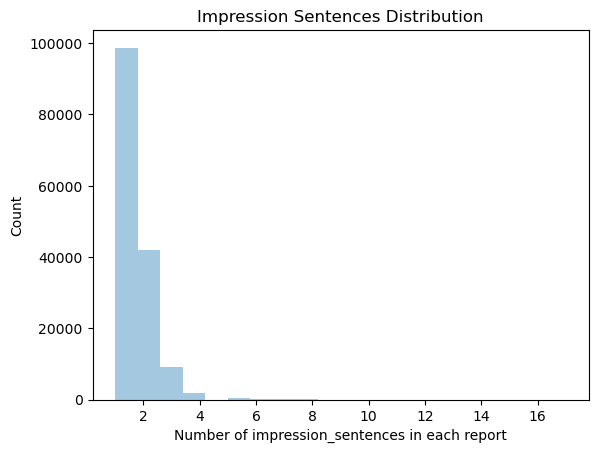

In [141]:
sns.distplot(impression_sentences, bins=20, kde=False)
plt.xlabel('Number of impression_sentences in each report')
plt.ylabel('Count')
plt.title('Impression Sentences Distribution')
plt.show()